# Borrador

In [1]:
using DataFrames
using CSV
using Plots
using Graphs
using GraphPlot
using Distances
using Colors

In [2]:
datos = DataFrame(CSV.File("Establecimientoseconomicos.csv"))

629×7 DataFrame
 Row │ Id       Nombre Establecimiento             Id Sector Económico  Descri ⋯
     │ Int64    String                             Int64                String ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ 2282670  ACABADOS VAME                                   434211  Comerc ⋯
   2 │ 8924599  ARVALLE                                         434221  Comerc
   3 │ 2034501  BODEGA                                          434311  Comerc
   4 │ 7764602  CARPINTERIA ENCINA                              434224  Comerc
   5 │ 2084183  DEPOSITO DENTAL FENIX                           435313  Comerc ⋯
   6 │ 8394728  EL CHINITO                                      435312  Comerc
   7 │ 7765296  IMPRENTA Y TAZAS                                435312  Comerc
   8 │ 9130846  MATERIAL ELECTRICO SAVINO                       434225  Comerc
   9 │ 9100452  MATERIAL ELECTRICO SAVINO                       434225  Comerc ⋯
  10 │ 7764724  MATERIALES DE CONSTRUCCION LEO                  434211  Comerc
  11 │ 2044440  MATERIALES GONZALEZ                             434211  Comerc
  ⋮  │    ⋮                     ⋮                           ⋮                  ⋱
 620 │ 2196993  WESTCOAST COMUNICATIONS                         466212  Comerc
 621 │ 7764887  XANATH VESTIDOS PARA NIÑA                       463211  Comerc ⋯
 622 │ 2054833  ZAPATERIA                                       464113  Comerc
 623 │ 2056029  ZAPATERIA                                       463310  Comerc
 624 │ 2282450  ZAPATERIA CHAVEZ                                463310  Comerc
 625 │ 2029862  ZAPATERIA ESTRELLITA                            463310  Comerc ⋯
 626 │ 6352619  ZAPATERÍA LA MODA SUCURSAL VALLE…               463310  Comerc
 627 │ 2116121  ZAPATERIA Y REGALOS                             465111  Comerc
 628 │ 6352539  ZERMAT                                          465111  Comerc
 629 │ 2028127  ZONA CERO                                       465211  Comerc ⋯
                                                  4 columns and 608 rows omitted

In [37]:
colores = include("colores.jl")
include("funciones.jl")

distanciaPromedioMasCorta (generic function with 1 method)

In [6]:
coordenadas = datos[!,[5,6]]

629×2 DataFrame
 Row │ Latitud  Longitud 
     │ Float64  Float64  
─────┼───────────────────
   1 │ 19.4906  -99.0478
   2 │ 19.4884  -99.0551
   3 │ 19.4883  -99.0556
   4 │ 19.4926  -99.0605
   5 │ 19.4853  -99.0476
   6 │ 19.4879  -99.0476
   7 │ 19.488   -99.0534
   8 │ 19.4873  -99.0458
   9 │ 19.4874  -99.0458
  10 │ 19.4851  -99.0461
  11 │ 19.4934  -99.0543
  ⋮  │    ⋮        ⋮
 620 │ 19.4924  -99.0582
 621 │ 19.4897  -99.0577
 622 │ 19.4885  -99.0453
 623 │ 19.4883  -99.0454
 624 │ 19.4916  -99.0565
 625 │ 19.4916  -99.0565
 626 │ 19.4889  -99.0471
 627 │ 19.4977  -99.0628
 628 │ 19.4923  -99.0548
 629 │ 19.4916  -99.0565
         608 rows omitted

In [7]:
N = length(datos.Id)
M = zeros(N,N)

for i in 1:N
    for j in 1:N
        x1, y1 = coordenadas[i,1], coordenadas[i,2]
        x2, y2 = coordenadas[j,1], coordenadas[j,2]
        M[i,j] = sqrt((x2-x1)^2+(y2-y1)^2)
    end
end

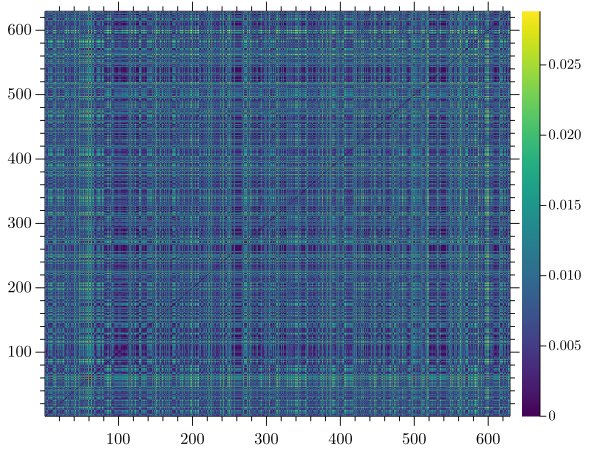

In [5]:
heatmap(M)

In [6]:
@time begin
    for h in range(0.0001, stop = 0.002, step = 0.00000001)
        A = M .< h
        G = Graph(A)
        if is_connected(G)
            return h
        end
    end
end

LoadError: InterruptException:

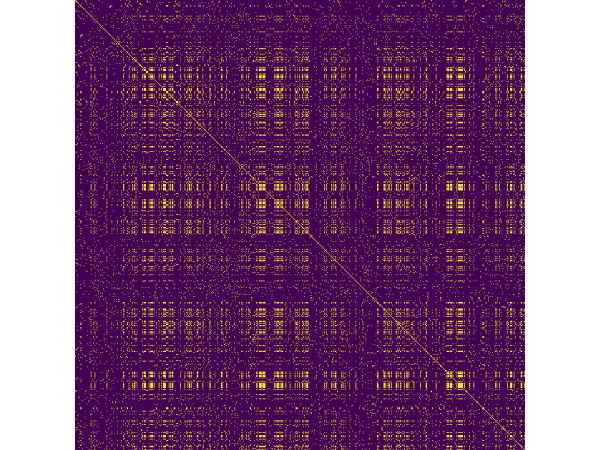

In [7]:
imshow(M .< 0.00155)

In [8]:
Mc = copy(M)
Mc = Mc .< 175/111111
for i in 1:629
    Mc[i,i] = 0
end
Mc

629×629 BitMatrix:
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  1  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  1  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  1  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  1  0  0  0  0  0  0  0  1  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  1  0  0  0  0     0  0  0  0  1  1  0  0  0  0  0  0
 0  0  0  0  0  0  0  1  0  0  0  0  0     0  0  0  0  1  1  0  0  0  0  0  0
 0  0  0  0  1  0  0  0  0  0  0  0  0     0  1  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  1  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0 

In [9]:
g = Graph(Mc)

{629, 17060} undirected simple Int64 graph

In [26]:
nodecolor = distinguishable_colors(74)
nodefillc = nodecolor[colores]

In [27]:
gplot(g,nodefillc=nodefillc,coordenadas[:,1],coordenadas[:,2])

## Propiedades generales de la red

In [38]:
println("número de nodos: ", nv(g))
println("número de enlaces: ", ne(g))
println("grado promedio: ",ne(g)/nv(g)/2)
println("clustering promedio: ", global_clustering_coefficient(g))
println("diámetro: ", diameter(g))
println("Distancia promedio más corta: ",distanciaPromedioMasCorta(g))

número de nodos: 629
número de enlaces: 17060
grado promedio: 13.56120826709062
clustering promedio: 0.9238503484474317
diámetro: 29
Distancia promedio más corta: 7.527639666643038


In [43]:
grados = degree(g)
maximum(grados)

150

In [45]:
xs = collect(1:629)
histogram(xs,grados)

LoadError: MethodError: no method matching histogram(::Vector{Int64}, ::Vector{Int64})
[0mClosest candidates are:
[0m  histogram(::Any; kv...) at ~/.julia/packages/GR/KPElO/src/jlgr.jl:2011

In [1]:
using PlotlyJS, DataFrames, Colors, CSV

WebIO._IJuliaInit()

In [2]:
colores = [1, 1, 2, 3, 4, 5, 5, 6, 6, 1, 1, 2, 1, 1, 7, 2, 8, 9, 10, 11, 5, 9, 12, 13, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 17, 18, 19, 20, 21, 21, 22, 23, 16, 19, 24, 24, 25, 17, 12, 26, 27, 20, 20, 16, 16, 28, 28, 29, 30, 31, 32, 33, 28, 28, 28, 34, 31, 35, 36, 30, 31, 31, 37, 38, 31, 31, 31, 31, 39, 31, 31, 31, 17, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 41, 18, 23, 23, 42, 24, 24, 24, 33, 33, 43, 44, 45, 46, 46, 46, 47, 48, 18, 49, 49, 49, 15, 49, 49, 49, 49, 49, 15, 15, 15, 15, 15, 49, 49, 50, 50, 50, 20, 51, 52, 53, 51, 51, 18, 46, 17, 12, 54, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 31, 15, 22, 15, 53, 55, 26, 31, 31, 21, 21, 38, 38, 38, 40, 28, 36, 54, 54, 54, 54, 56, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 14, 17, 17, 17, 17, 17, 37, 37, 37, 37, 37, 31, 44, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 29, 57, 31, 58, 44, 23, 16, 56, 18, 18, 46, 59, 12, 12, 12, 12, 12, 12, 12, 37, 17, 47, 48, 48, 48, 48, 44, 19, 27, 19, 19, 61, 37, 15, 15, 62, 17, 49, 45, 12, 43, 15, 21, 41, 37, 37, 41, 23, 54, 19, 17, 16, 63, 63, 41, 41, 63, 41, 35, 35, 35, 35, 35, 35, 26, 15, 58, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 25, 31, 42, 33, 33, 33, 41, 64, 16, 20, 56, 56, 65, 14, 66, 66, 66, 66, 66, 58, 58, 58, 58, 62, 62, 62, 62, 62, 38, 38, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 38, 38, 38, 44, 44, 44, 44, 44, 26, 44, 68, 69, 69, 69, 44, 46, 46, 46, 46, 18, 48, 17, 17, 17, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 32, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 12, 12, 12, 12, 56, 56, 15, 49, 44, 24, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 28, 68, 21, 21, 32, 32, 32, 32, 32, 32, 32, 32, 20, 70, 21, 26, 48, 26, 67, 26, 48, 26, 26, 68, 41, 71, 31, 31, 31, 31, 51, 31, 36, 31, 31, 31, 31, 44, 54, 31, 55, 58, 55, 12, 15, 58, 47, 47, 53, 17, 26, 18, 72, 18, 15, 15, 15, 15, 15, 15, 15, 15, 15, 26, 31, 31, 31, 15, 15, 15, 15, 15, 15, 56, 56, 15, 15, 15, 58, 58, 17, 17, 17, 17, 49, 22, 17, 31, 27, 73, 19, 28, 74, 41, 41, 28, 43, 38, 13, 26, 31, 31, 31, 32, 40, 40, 51, 24, 24, 15, 40, 43, 24, 20, 18, 31, 56, 57, 57, 57, 57, 44, 44, 74]
nodecolor = distinguishable_colors(74)
nodefillc = nodecolor[colores]

In [3]:
idSE = [434211, 434221, 434311, 434224, 435313, 435312, 435312, 434225, 434225, 434211, 434211, 434311, 434211, 434211, 431110, 434311, 431191, 435419, 434226, 435319, 435312, 435419, 467115, 466112, 464112, 461110, 461110, 461110, 461110, 461110, 461110, 461110, 461110, 461110, 461110, 461110, 461110, 461110, 461110, 461110, 461110, 461110, 461110, 461110, 461110, 461110, 461110, 461110, 461110, 461110, 461110, 461110, 461110, 461110, 461110, 461110, 461110, 461110, 461110, 461110, 461110, 461110, 461110, 461110, 461110, 461110, 461110, 461110, 461110, 461110, 467112, 467111, 466212, 465911, 468211, 461213, 461213, 461122, 466319, 467112, 465911, 467114, 467114, 463216, 467111, 467115, 465912, 465913, 468211, 468211, 467112, 467112, 466410, 466410, 463112, 463212, 463211, 461130, 461140, 466410, 466410, 466410, 462111, 463211, 463113, 463213, 463212, 463211, 463211, 466312, 461190, 463211, 463211, 463211, 463211, 465919, 463211, 463211, 463211, 467111, 461121, 461121, 461121, 461121, 461121, 461121, 461121, 461121, 461121, 461121, 461121, 461121, 461121, 461121, 461121, 461121, 461160, 466212, 466319, 466319, 461212, 467114, 467114, 467114, 461140, 461140, 466111, 465111, 465312, 467113, 467113, 467113, 465112, 465212, 466212, 461150, 461150, 461150, 461110, 461150, 461150, 461150, 461150, 461150, 461110, 461110, 461110, 461110, 461110, 461150, 461150, 466114, 466114, 466114, 468211, 465215, 465915, 466311, 465215, 465215, 466212, 467113, 467111, 467115, 464111, 461160, 461160, 461160, 461160, 461160, 461160, 461160, 461160, 461160, 461160, 461160, 461160, 463211, 461110, 461122, 461110, 466311, 468411, 465912, 463211, 463211, 461213, 461213, 461190, 461190, 461190, 461121, 466410, 463213, 464111, 464111, 464111, 464111, 464113, 464111, 464111, 464111, 464111, 464111, 464111, 464111, 464111, 464111, 464111, 464111, 464111, 464111, 464111, 464111, 464111, 464112, 467111, 467111, 467111, 467111, 467111, 466312, 466312, 466312, 466312, 466312, 463211, 465111, 461130, 461130, 461130, 461130, 461130, 461130, 461130, 461130, 461130, 461130, 461130, 461130, 461130, 461130, 461130, 461130, 463112, 463310, 463211, 462112, 465111, 466319, 467112, 464113, 466212, 466212, 467113, 466314, 467115, 467115, 467115, 467115, 467115, 467115, 467115, 466312, 467111, 465112, 465212, 465212, 465212, 465212, 465111, 465911, 465913, 465911, 465911, 461211, 466312, 461110, 461110, 461170, 467111, 461150, 465312, 467115, 466111, 461110, 461213, 461160, 466312, 466312, 461160, 466319, 464111, 465911, 467111, 467112, 465914, 465914, 461160, 461160, 465914, 461160, 463113, 463113, 463113, 463113, 463113, 463113, 465912, 461110, 462112, 461110, 461110, 461110, 461110, 461110, 461110, 461110, 461110, 461110, 461110, 461110, 461110, 461110, 461110, 461110, 461110, 463216, 463211, 461212, 461140, 461140, 461140, 461160, 468311, 467112, 468211, 464113, 464113, 462210, 464112, 464121, 464121, 464121, 464121, 464121, 462112, 462112, 462112, 462112, 461170, 461170, 461170, 461170, 461170, 461190, 461190, 465311, 465311, 465311, 465311, 465311, 465311, 465311, 465311, 465311, 465311, 465311, 465311, 465311, 465311, 465311, 465311, 465311, 465311, 465311, 465311, 465311, 465311, 465311, 465311, 465311, 465311, 465311, 465311, 465311, 465311, 465311, 465311, 465311, 465311, 465311, 465311, 465311, 465311, 465311, 465311, 465311, 465311, 465311, 465311, 465311, 465311, 465311, 465311, 465311, 465311, 465311, 465311, 461190, 461190, 461190, 465111, 465111, 465111, 465111, 465111, 465912, 465111, 465313, 461123, 461123, 461123, 465111, 467113, 467113, 467113, 467113, 466212, 465212, 467111, 467111, 467111, 461122, 461122, 461122, 461122, 461122, 461122, 461122, 461122, 461122, 461122, 461122, 461122, 461122, 461122, 461122, 461122, 461122, 461122, 461130, 461122, 461122, 461122, 461122, 461122, 461122, 461122, 461122, 461122, 461122, 461122, 467115, 467115, 467115, 467115, 464113, 464113, 461110, 461150, 465111, 467114, 465313, 465313, 465313, 465313, 465313, 465313, 465313, 465313, 465313, 465313, 465313, 465313, 466410, 465313, 461213, 461213, 461130, 461130, 461130, 461130, 461130, 461130, 461130, 461130, 468211, 468420, 461213, 465912, 465212, 465912, 465311, 465912, 465212, 465912, 465912, 465313, 461160, 468213, 463211, 463211, 463211, 463211, 465215, 463211, 463213, 463211, 463211, 463211, 463211, 465111, 464111, 463211, 468411, 462112, 468411, 467115, 461110, 462112, 465112, 465112, 466311, 467111, 465912, 466212, 463111, 466212, 461110, 461110, 461110, 461110, 461110, 461110, 461110, 461110, 461110, 465912, 463211, 463211, 463211, 461110, 461110, 461110, 461110, 461110, 461110, 464113, 464113, 461110, 461110, 461110, 462112, 462112, 467111, 467111, 467111, 467111, 461150, 461122, 467111, 463211, 465913, 463215, 465911, 466410, 465211, 461160, 461160, 466410, 466111, 461190, 466112, 465912, 463211, 463211, 463211, 461130, 461121, 461121, 465215, 467114, 467114, 461110, 461121, 466111, 467114, 468211, 466212, 463211, 464113, 463310, 463310, 463310, 463310, 465111, 465111, 465211]

629-element Vector{Int64}:
 434211
 434221
 434311
 434224
 435313
 435312
 435312
 434225
 434225
 434211
 434211
 434311
 434211
      ⋮
 467114
 468211
 466212
 463211
 464113
 463310
 463310
 463310
 463310
 465111
 465111
 465211

In [4]:
des = ["Comercio al por mayor de cemento, tabique y grava", "Comercio al por mayor de materiales metálicos para la construcción y la manufactura", "Comercio al por mayor de desechos metálicos", "Comercio al por mayor de madera para la construcción y la industria", "Comercio al por mayor de mobiliario, equipo e instrumental médico y de laboratorio", "Comercio al por mayor de artículos y accesorios para diseño y pintura artística", "Comercio al por mayor de artículos y accesorios para diseño y pintura artística", "Comercio al por mayor de equipo y material eléctrico", "Comercio al por mayor de equipo y material eléctrico", "Comercio al por mayor de cemento, tabique y grava", "Comercio al por mayor de cemento, tabique y grava", "Comercio al por mayor de desechos metálicos", "Comercio al por mayor de cemento, tabique y grava", "Comercio al por mayor de cemento, tabique y grava", "Comercio al por mayor de abarrotes", "Comercio al por mayor de desechos metálicos", "Comercio al por mayor de pan y pasteles", "Comercio al por mayor de otra maquinaria y equipo de uso general", "Comercio al por mayor de pintura", "Comercio al por mayor de maquinaria y equipo para otros servicios y para actividades comerciales", "Comercio al por mayor de artículos y accesorios para diseño y pintura artística", "Comercio al por mayor de otra maquinaria y equipo de uso general", "Comercio al por menor de artículos para la limpieza", "Comercio al por menor de electrodomésticos menores y aparatos de línea blanca", "Farmacias con minisúper", "Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas", "Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas", "Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas", "Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas", "Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas", "Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas", "Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas", "Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas", "Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas", "Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas", "Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas", "Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas", "Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas", "Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas", "Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas", "Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas", "Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas", "Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas", "Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas", "Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas", "Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas", "Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas", "Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas", "Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas", "Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas", "Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas", "Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas", "Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas", "Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas", "Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas", "Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas", "Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas", "Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas", "Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas", "Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas", "Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas", "Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas", "Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas", "Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas", "Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas", "Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas", "Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas", "Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas", "Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas", "Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas", "Comercio al por menor de pisos y recubrimientos cerámicos", "Comercio al por menor en ferreterías y tlapalerías", "Comercio al por menor de teléfonos y otros aparatos de comunicación", "Comercio al por menor de mascotas", "Comercio al por menor de partes y refacciones nuevas para automóviles, camionetas y camiones", "Comercio al por menor de bebidas no alcohólicas y hielo", "Comercio al por menor de bebidas no alcohólicas y hielo", "Comercio al por menor de carne de aves", "Comercio al por menor de otros artículos para la decoración de interiores", "Comercio al por menor de pisos y recubrimientos cerámicos", "Comercio al por menor de mascotas", "Comercio al por menor de vidrios y espejos", "Comercio al por menor de vidrios y espejos", "Comercio al por menor de ropa de cuero y piel y de otros artículos de estos materiales", "Comercio al por menor en ferreterías y tlapalerías", "Comercio al por menor de artículos para la limpieza", "Comercio al por menor de regalos", "Comercio al por menor de artículos religiosos", "Comercio al por menor de partes y refacciones nuevas para automóviles, camionetas y camiones", "Comercio al por menor de partes y refacciones nuevas para automóviles, camionetas y camiones", "Comercio al por menor de pisos y recubrimientos cerámicos", "Comercio al por menor de pisos y recubrimientos cerámicos", "Comercio al por menor de artículos usados", "Comercio al por menor de artículos usados", "Comercio al por menor de blancos", "Comercio al por menor de ropa de bebé", "Comercio al por menor de ropa, excepto de bebé y lencería", "Comercio al por menor de frutas y verduras frescas", "Comercio al por menor de semillas y granos alimenticios, especias y chiles secos", "Comercio al por menor de artículos usados", "Comercio al por menor de artículos usados", "Comercio al por menor de artículos usados", "Comercio al por menor en supermercados", "Comercio al por menor de ropa, excepto de bebé y lencería", "Comercio al por menor de artículos de mercería y bonetería", "Comercio al por menor de lencería", "Comercio al por menor de ropa de bebé", "Comercio al por menor de ropa, excepto de bebé y lencería", "Comercio al por menor de ropa, excepto de bebé y lencería", "Comercio al por menor de plantas y flores naturales", "Comercio al por menor de otros alimentos", "Comercio al por menor de ropa, excepto de bebé y lencería", "Comercio al por menor de ropa, excepto de bebé y lencería", "Comercio al por menor de ropa, excepto de bebé y lencería", "Comercio al por menor de ropa, excepto de bebé y lencería", "Comercio al por menor de otros artículos de uso personal", "Comercio al por menor de ropa, excepto de bebé y lencería", "Comercio al por menor de ropa, excepto de bebé y lencería", "Comercio al por menor de ropa, excepto de bebé y lencería", "Comercio al por menor en ferreterías y tlapalerías", "Comercio al por menor de carnes rojas", "Comercio al por menor de carnes rojas", "Comercio al por menor de carnes rojas", "Comercio al por menor de carnes rojas", "Comercio al por menor de carnes rojas", "Comercio al por menor de carnes rojas", "Comercio al por menor de carnes rojas", "Comercio al por menor de carnes rojas", "Comercio al por menor de carnes rojas", "Comercio al por menor de carnes rojas", "Comercio al por menor de carnes rojas", "Comercio al por menor de carnes rojas", "Comercio al por menor de carnes rojas", "Comercio al por menor de carnes rojas", "Comercio al por menor de carnes rojas", "Comercio al por menor de carnes rojas", "Comercio al por menor de dulces y materias primas para repostería", "Comercio al por menor de teléfonos y otros aparatos de comunicación", "Comercio al por menor de otros artículos para la decoración de interiores", "Comercio al por menor de otros artículos para la decoración de interiores", "Comercio al por menor de cerveza", "Comercio al por menor de vidrios y espejos", "Comercio al por menor de vidrios y espejos", "Comercio al por menor de vidrios y espejos", "Comercio al por menor de semillas y granos alimenticios, especias y chiles secos", "Comercio al por menor de semillas y granos alimenticios, especias y chiles secos", "Comercio al por menor de muebles para el hogar", "Comercio al por menor de artículos de perfumería y cosméticos", "Comercio al por menor de libros", "Comercio al por menor de pintura", "Comercio al por menor de pintura", "Comercio al por menor de pintura", "Comercio al por menor de artículos de joyería y relojes", "Comercio al por menor de juguetes", "Comercio al por menor de teléfonos y otros aparatos de comunicación", "Comercio al por menor de leche, otros productos lácteos y embutidos", "Comercio al por menor de leche, otros productos lácteos y embutidos", "Comercio al por menor de leche, otros productos lácteos y embutidos", "Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas", "Comercio al por menor de leche, otros productos lácteos y embutidos", "Comercio al por menor de leche, otros productos lácteos y embutidos", "Comercio al por menor de leche, otros productos lácteos y embutidos",
    "Comercio al por menor de leche,otros productos lácteos y embutidos", "Comercio al por menor de leche, otros productos lácteos y embutidos", "Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas", "Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas", "Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas", "Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas", "Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas", "Comercio al por menor de leche, otros productos lácteos y embutidos", "Comercio al por menor de leche, otros productos lácteos y embutidos", "Comercio al por menor de cristalería, loza y utensilios de cocina", "Comercio al por menor de cristalería, loza y utensilios de cocina", "Comercio al por menor de cristalería, loza y utensilios de cocina", "Comercio al por menor de partes y refacciones nuevas para automóviles, camionetas y camiones", "Comercio al por menor de artículos y aparatos deportivos", "Comercio al por menor en tiendas de artesanías", "Comercio al por menor de alfombras, cortinas, tapices y similares", "Comercio al por menor de artículos y aparatos deportivos", "Comercio al por menor de artículos y aparatos deportivos", "Comercio al por menor de teléfonos y otros aparatos de comunicación", "Comercio al por menor de pintura", "Comercio al por menor en ferreterías y tlapalerías", "Comercio al por menor de artículos para la limpieza", "Farmacias sin minisúper", "Comercio al por menor de dulces y materias primas para repostería", "Comercio al por menor de dulces y materias primas para repostería", "Comercio al por menor de dulces y materias primas para repostería", "Comercio al por menor de dulces y materias primas para repostería", "Comercio al por menor de dulces y materias primas para repostería", "Comercio al por menor de dulces y materias primas para repostería", "Comercio al por menor de dulces y materias primas para repostería", "Comercio al por menor de dulces y materias primas para repostería", "Comercio al por menor de dulces y materias primas para repostería", "Comercio al por menor de dulces y materias primas para repostería", "Comercio al por menor de dulces y materias primas para repostería", "Comercio al por menor de dulces y materias primas para repostería", "Comercio al por menor de ropa, excepto de bebé y lencería", "Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas", "Comercio al por menor de carne de aves", "Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas", "Comercio al por menor de alfombras, cortinas, tapices y similares", "Comercio al por menor de gasolina y diesel", "Comercio al por menor de regalos", "Comercio al por menor de ropa, excepto de bebé y lencería", "Comercio al por menor de ropa, excepto de bebé y lencería", "Comercio al por menor de bebidas no alcohólicas y hielo", "Comercio al por menor de bebidas no alcohólicas y hielo", "Comercio al por menor de otros alimentos", "Comercio al por menor de otros alimentos", "Comercio al por menor de otros alimentos", "Comercio al por menor de carnes rojas", "Comercio al por menor de artículos usados", "Comercio al por menor de lencería", "Farmacias sin minisúper", "Farmacias sin minisúper", "Farmacias sin minisúper", "Farmacias sin minisúper", "Comercio al por menor de productos naturistas, medicamentos homeopáticos y de complementos alimenticios", "Farmacias sin minisúper", "Farmacias sin minisúper", "Farmacias sin minisúper", "Farmacias sin minisúper", "Farmacias sin minisúper", "Farmacias sin minisúper", "Farmacias sin minisúper", "Farmacias sin minisúper", "Farmacias sin minisúper", "Farmacias sin minisúper", "Farmacias sin minisúper", "Farmacias sin minisúper", "Farmacias sin minisúper", "Farmacias sin minisúper", "Farmacias sin minisúper", "Farmacias sin minisúper", "Farmacias con minisúper", "Comercio al por menor en ferreterías y tlapalerías", "Comercio al por menor en ferreterías y tlapalerías", "Comercio al por menor en ferreterías y tlapalerías", "Comercio al por menor en ferreterías y tlapalerías", "Comercio al por menor en ferreterías y tlapalerías", "Comercio al por menor de plantas y flores naturales", "Comercio al por menor de plantas y flores naturales", "Comercio al por menor de plantas y flores naturales", "Comercio al por menor de plantas y flores naturales", "Comercio al por menor de plantas y flores naturales", "Comercio al por menor de ropa, excepto de bebé y lencería", "Comercio al por menor de artículos de perfumería y cosméticos", "Comercio al por menor de frutas y verduras frescas", "Comercio al por menor de frutas y verduras frescas", "Comercio al por menor de frutas y verduras frescas", "Comercio al por menor de frutas y verduras frescas", "Comercio al por menor de frutas y verduras frescas", "Comercio al por menor de frutas y verduras frescas", "Comercio al por menor de frutas y verduras frescas", "Comercio al por menor de frutas y verduras frescas", "Comercio al por menor de frutas y verduras frescas", "Comercio al por menor de frutas y verduras frescas", "Comercio al por menor de frutas y verduras frescas", "Comercio al por menor de frutas y verduras frescas", "Comercio al por menor de frutas y verduras frescas", "Comercio al por menor de frutas y verduras frescas", "Comercio al por menor de frutas y verduras frescas", "Comercio al por menor de frutas y verduras frescas", "Comercio al por menor de blancos", "Comercio al por menor de calzado", "Comercio al por menor de ropa, excepto de bebé y lencería", "Comercio al por menor en minisupers", "Comercio al por menor de artículos de perfumería y cosméticos", "Comercio al por menor de otros artículos para la decoración de interiores", "Comercio al por menor de pisos y recubrimientos cerámicos", "Comercio al por menor de productos naturistas, medicamentos homeopáticos y de complementos alimenticios", "Comercio al por menor de teléfonos y otros aparatos de comunicación", "Comercio al por menor de teléfonos y otros aparatos de comunicación", "Comercio al por menor de pintura", "Comercio al por menor de lámparas ornamentales y candiles", "Comercio al por menor de artículos para la limpieza", "Comercio al por menor de artículos para la limpieza", "Comercio al por menor de artículos para la limpieza", "Comercio al por menor de artículos para la limpieza", "Comercio al por menor de artículos para la limpieza", "Comercio al por menor de artículos para la limpieza", "Comercio al por menor de artículos para la limpieza", "Comercio al por menor de plantas y flores naturales", "Comercio al por menor en ferreterías y tlapalerías", "Comercio al por menor de artículos de joyería y relojes", "Comercio al por menor de juguetes", "Comercio al por menor de juguetes", "Comercio al por menor de juguetes", "Comercio al por menor de juguetes", "Comercio al por menor de artículos de perfumería y cosméticos", "Comercio al por menor de mascotas", "Comercio al por menor de artículos religiosos", "Comercio al por menor de mascotas", "Comercio al por menor de mascotas", "Comercio al por menor de vinos y licores", "Comercio al por menor de plantas y flores naturales", "Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas", "Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas", "Comercio al por menor de paletas de hielo y helados", "Comercio al por menor en ferreterías y tlapalerías", "Comercio al por menor de leche, otros productos lácteos y embutidos", "Comercio al por menor de libros", "Comercio al por menor de artículos para la limpieza", "Comercio al por menor de muebles para el hogar", "Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas", "Comercio al por menor de bebidas no alcohólicas y hielo", "Comercio al por menor de dulces y materias primas para repostería", "Comercio al por menor de plantas y flores naturales", "Comercio al por menor de plantas y flores naturales", "Comercio al por menor de dulces y materias primas para repostería", "Comercio al por menor de otros artículos para la decoración de interiores", "Farmacias sin minisúper", "Comercio al por menor de mascotas", "Comercio al por menor en ferreterías y tlapalerías", "Comercio al por menor de pisos y recubrimientos cerámicos", "Comercio al por menor de artículos desechables", "Comercio al por menor de artículos desechables", "Comercio al por menor de dulces y materias primas para repostería", "Comercio al por menor de dulces y materias primas para repostería", "Comercio al por menor de artículos desechables", "Comercio al por menor de dulces y materias primas para repostería", "Comercio al por menor de artículos de mercería y bonetería", "Comercio al por menor de artículos de mercería y bonetería", "Comercio al por menor de artículos de mercería y bonetería", "Comercio al por menor de artículos de mercería y bonetería", "Comercio al por menor de artículos de mercería y bonetería", "Comercio al por menor de artículos de mercería y bonetería", "Comercio al por menor de regalos", "Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas", "Comercio al por menor en minisupers", "Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas", "Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas", "Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas", "Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas", "Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas", "Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas", "Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas", "Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas", "Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas", "Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas", "Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas", 
"Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas", "Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas", "Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas", "Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas", "Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas", "Comercio al por menor de ropa de cuero y piel y de otros artículos de estos materiales", "Comercio al por menor de ropa, excepto de bebé y lencería", "Comercio al por menor de cerveza", "Comercio al por menor de semillas y granos alimenticios, especias y chiles secos", "Comercio al por menor de semillas y granos alimenticios, especias y chiles secos", "Comercio al por menor de semillas y granos alimenticios, especias y chiles secos", "Comercio al por menor de dulces y materias primas para repostería", "Comercio al por menor de motocicletas", "Comercio al por menor de pisos y recubrimientos cerámicos", "Comercio al por menor de partes y refacciones nuevas para automóviles, camionetas y camiones", "Comercio al por menor de productos naturistas, medicamentos homeopáticos y de complementos alimenticios", "Comercio al por menor de productos naturistas, medicamentos homeopáticos y de complementos alimenticios", "Comercio al por menor en tiendas departamentales", "Farmacias con minisúper", "Comercio al por menor de lentes", "Comercio al por menor de lentes", "Comercio al por menor de lentes", "Comercio al por menor de lentes", "Comercio al por menor de lentes", "Comercio al por menor en minisupers", "Comercio al por menor en minisupers", "Comercio al por menor en minisupers", "Comercio al por menor en minisupers", "Comercio al por menor de paletas de hielo y helados", "Comercio al por menor de paletas de hielo y helados", "Comercio al por menor de paletas de hielo y helados", "Comercio al por menor de paletas de hielo y helados", "Comercio al por menor de paletas de hielo y helados", "Comercio al por menor de otros alimentos", "Comercio al por menor de otros alimentos", "Comercio al por menor de artículos de papelería", "Comercio al por menor de artículos de papelería", "Comercio al por menor de artículos de papelería", "Comercio al por menor de artículos de papelería", "Comercio al por menor de artículos de papelería", "Comercio al por menor de artículos de papelería", "Comercio al por menor de artículos de papelería", "Comercio al por menor de artículos de papelería", "Comercio al por menor de artículos de papelería", "Comercio al por menor de artículos de papelería", "Comercio al por menor de artículos de papelería", "Comercio al por menor de artículos de papelería", "Comercio al por menor de artículos de papelería", "Comercio al por menor de artículos de papelería", "Comercio al por menor de artículos de papelería", "Comercio al por menor de artículos de papelería", "Comercio al por menor de artículos de papelería", "Comercio al por menor de artículos de papelería", "Comercio al por menor de artículos de papelería", "Comercio al por menor de artículos de papelería", "Comercio al por menor de artículos de papelería", "Comercio al por menor de artículos de papelería", "Comercio al por menor de artículos de papelería", "Comercio al por menor de artículos de papelería", "Comercio al por menor de artículos de papelería", "Comercio al por menor de artículos de papelería", "Comercio al por menor de artículos de papelería", "Comercio al por menor de artículos de papelería", "Comercio al por menor de artículos de papelería", "Comercio al por menor de artículos de papelería", "Comercio al por menor de artículos de papelería", "Comercio al por menor de artículos de papelería", "Comercio al por menor de artículos de papelería", "Comercio al por menor de artículos de papelería", "Comercio al por menor de artículos de papelería", "Comercio al por menor de artículos de papelería", "Comercio al por menor de artículos de papelería", "Comercio al por menor de artículos de papelería", "Comercio al por menor de artículos de papelería", "Comercio al por menor de artículos de papelería", "Comercio al por menor de artículos de papelería", "Comercio al por menor de artículos de papelería", "Comercio al por menor de artículos de papelería", "Comercio al por menor de artículos de papelería", "Comercio al por menor de artículos de papelería", "Comercio al por menor de artículos de papelería", "Comercio al por menor de artículos de papelería", "Comercio al por menor de artículos de papelería", "Comercio al por menor de artículos de papelería", "Comercio al por menor de artículos de papelería", "Comercio al por menor de artículos de papelería", "Comercio al por menor de artículos de papelería", "Comercio al por menor de otros alimentos", "Comercio al por menor de otros alimentos", "Comercio al por menor de otros alimentos", "Comercio al por menor de artículos de perfumería y cosméticos", "Comercio al por menor de artículos de perfumería y cosméticos", "Comercio al por menor de artículos de perfumería y cosméticos", "Comercio al por menor de artículos de perfumería y cosméticos", "Comercio al por menor de artículos de perfumería y cosméticos", "Comercio al por menor de regalos", "Comercio al por menor de artículos de perfumería y cosméticos", "Comercio al por menor de revistas y periódicos", "Comercio al por menor de pescados y mariscos", "Comercio al por menor de pescados y mariscos", "Comercio al por menor de pescados y mariscos", "Comercio al por menor de artículos de perfumería y cosméticos", "Comercio al por menor de pintura", "Comercio al por menor de pintura", "Comercio al por menor de pintura", "Comercio al por menor de pintura", "Comercio al por menor de teléfonos y otros aparatos de comunicación", "Comercio al por menor de juguetes", "Comercio al por menor en ferreterías y tlapalerías", "Comercio al por menor en ferreterías y tlapalerías", "Comercio al por menor en ferreterías y tlapalerías", "Comercio al por menor de carne de aves", "Comercio al por menor de carne de aves", "Comercio al por menor de carne de aves", "Comercio al por menor de carne de aves", "Comercio al por menor de carne de aves", "Comercio al por menor de carne de aves", "Comercio al por menor de carne de aves", "Comercio al por menor de carne de aves", "Comercio al por menor de carne de aves", "Comercio al por menor de carne de aves", "Comercio al por menor de carne de aves", "Comercio al por menor de carne de aves", "Comercio al por menor de carne de aves", "Comercio al por menor de carne de aves", "Comercio al por menor de carne de aves", "Comercio al por menor de carne de aves", "Comercio al por menor de carne de aves", "Comercio al por menor de carne de aves", "Comercio al por menor de frutas y verduras frescas", "Comercio al por menor de carne de aves", "Comercio al por menor de carne de aves", "Comercio al por menor de carne de aves", "Comercio al por menor de carne de aves", "Comercio al por menor de carne de aves", "Comercio al por menor de carne de aves", "Comercio al por menor de carne de aves", "Comercio al por menor de carne de aves", "Comercio al por menor de carne de aves", "Comercio al por menor de carne de aves", "Comercio al por menor de carne de aves", "Comercio al por menor de artículos para la limpieza", "Comercio al por menor de artículos para la limpieza", "Comercio al por menor de artículos para la limpieza", "Comercio al por menor de artículos para la limpieza", "Comercio al por menor de productos naturistas, medicamentos homeopáticos y de complementos alimenticios", "Comercio al por menor de productos naturistas, medicamentos homeopáticos y de complementos alimenticios", "Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas", "Comercio al por menor de leche, otros productos lácteos y embutidos", "Comercio al por menor de artículos de perfumería y cosméticos", "Comercio al por menor de vidrios y espejos", "Comercio al por menor de revistas y periódicos", "Comercio al por menor de revistas y periódicos", "Comercio al por menor de revistas y periódicos", "Comercio al por menor de revistas y periódicos", "Comercio al por menor de revistas y periódicos", "Comercio al por menor de revistas y periódicos", "Comercio al por menor de revistas y periódicos", "Comercio al por menor de revistas y periódicos", "Comercio al por menor de revistas y periódicos", "Comercio al por menor de revistas y periódicos", "Comercio al por menor de revistas y periódicos", "Comercio al por menor de revistas y periódicos", "Comercio al por menor de artículos usados", "Comercio al por menor de revistas y periódicos", "Comercio al por menor de bebidas no alcohólicas y hielo", "Comercio al por menor de bebidas no alcohólicas y hielo", "Comercio al por menor de frutas y verduras frescas", "Comercio al por menor de frutas y verduras frescas", "Comercio al por menor de frutas y verduras frescas", "Comercio al por menor de frutas y verduras frescas", "Comercio al por menor de frutas y verduras frescas", "Comercio al por menor de frutas y verduras frescas", "Comercio al por menor de frutas y verduras frescas", "Comercio al por menor de frutas y verduras frescas", "Comercio al por menor de partes y refacciones nuevas para automóviles, camionetas y camiones", "Comercio al por menor de aceites y grasas lubricantes, aditivos y similares para vehículos de motor", "Comercio al por menor de bebidas no alcohólicas y hielo", "Comercio al por menor de regalos", "Comercio al por menor de juguetes", "Comercio al por menor de regalos", "Comercio al por menor de artículos de papelería", "Comercio al por menor de regalos", "Comercio al por menor de juguetes", "Comercio al por menor de regalos", "Comercio al por menor de regalos", "Comercio al por menor de revistas y periódicos", "Comercio al por menor de dulces y materias primas para repostería", "Comercio al por menor de llantas y cámaras para automóviles, camionetas y camiones", "Comercio al por menor de ropa, excepto de bebé y lencería", "Comercio al por menor de ropa, excepto de bebé y lencería", 
"Comercio al por menor de ropa, excepto de bebé y lencería", "Comercio al por menor de ropa, excepto de bebé y lencería", "Comercio al por menor de artículos y aparatos deportivos", "Comercio al por menor de ropa, excepto de bebé y lencería", "Comercio al por menor de lencería", "Comercio al por menor de ropa, excepto de bebé y lencería", "Comercio al por menor de ropa, excepto de bebé y lencería", "Comercio al por menor de ropa, excepto de bebé y lencería", "Comercio al por menor de ropa, excepto de bebé y lencería", "Comercio al por menor de artículos de perfumería y cosméticos", "Farmacias sin minisúper", "Comercio al por menor de ropa, excepto de bebé y lencería", "Comercio al por menor de gasolina y diesel", "Comercio al por menor en minisupers", "Comercio al por menor de gasolina y diesel", "Comercio al por menor de artículos para la limpieza", "Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas", "Comercio al por menor en minisupers", "Comercio al por menor de artículos de joyería y relojes", "Comercio al por menor de artículos de joyería y relojes", "Comercio al por menor de alfombras, cortinas, tapices y similares", "Comercio al por menor en ferreterías y tlapalerías", "Comercio al por menor de regalos", "Comercio al por menor de teléfonos y otros aparatos de comunicación", "Comercio al por menor de telas", "Comercio al por menor de teléfonos y otros aparatos de comunicación", "Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas", "Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas", "Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas", "Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas", "Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas", "Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas", "Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas", "Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas", "Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas", "Comercio al por menor de regalos", "Comercio al por menor de ropa, excepto de bebé y lencería", "Comercio al por menor de ropa, excepto de bebé y lencería", "Comercio al por menor de ropa, excepto de bebé y lencería", "Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas", "Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas", "Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas", "Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas", "Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas", "Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas", "Comercio al por menor de productos naturistas, medicamentos homeopáticos y de complementos alimenticios", "Comercio al por menor de productos naturistas, medicamentos homeopáticos y de complementos alimenticios", "Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas", "Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas", "Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas", "Comercio al por menor en minisupers", "Comercio al por menor en minisupers", "Comercio al por menor en ferreterías y tlapalerías", "Comercio al por menor en ferreterías y tlapalerías", "Comercio al por menor en ferreterías y tlapalerías", "Comercio al por menor en ferreterías y tlapalerías", "Comercio al por menor de leche, otros productos lácteos y embutidos", "Comercio al por menor de carne de aves", "Comercio al por menor en ferreterías y tlapalerías", "Comercio al por menor de ropa, excepto de bebé y lencería", "Comercio al por menor de artículos religiosos", "Comercio al por menor de bisutería y accesorios de vestir", "Comercio al por menor de mascotas", "Comercio al por menor de artículos usados", "Comercio al por menor de discos y casetes", "Comercio al por menor de dulces y materias primas para repostería", "Comercio al por menor de dulces y materias primas para repostería", "Comercio al por menor de artículos usados", "Comercio al por menor de muebles para el hogar", "Comercio al por menor de otros alimentos", "Comercio al por menor de electrodomésticos menores y aparatos de línea blanca", "Comercio al por menor de regalos", "Comercio al por menor de ropa, excepto de bebé y lencería", "Comercio al por menor de ropa, excepto de bebé y lencería", "Comercio al por menor de ropa, excepto de bebé y lencería", "Comercio al por menor de frutas y verduras frescas", "Comercio al por menor de carnes rojas", "Comercio al por menor de carnes rojas", "Comercio al por menor de artículos y aparatos deportivos", "Comercio al por menor de vidrios y espejos", "Comercio al por menor de vidrios y espejos", "Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas", "Comercio al por menor de carnes rojas", "Comercio al por menor de muebles para el hogar", "Comercio al por menor de vidrios y espejos", "Comercio al por menor de partes y refacciones nuevas para automóviles, camionetas y camiones", "Comercio al por menor de teléfonos y otros aparatos de comunicación", "Comercio al por menor de ropa, excepto de bebé y lencería", "Comercio al por menor de productos naturistas, medicamentos homeopáticos y de complementos alimenticios", "Comercio al por menor de calzado", "Comercio al por menor de calzado", "Comercio al por menor de calzado", "Comercio al por menor de calzado", "Comercio al por menor de artículos de perfumería y cosméticos", "Comercio al por menor de artículos de perfumería y cosméticos", "Comercio al por menor de discos y casetes" ]

629-element Vector{String}:
 "Comercio al por mayor de cemento, tabique y grava"
 "Comercio al por mayor de materi" ⋯ 22 bytes ⋯ "a construcción y la manufactura"
 "Comercio al por mayor de desechos metálicos"
 "Comercio al por mayor de madera para la construcción y la industria"
 "Comercio al por mayor de mobili" ⋯ 20 bytes ⋯ "umental médico y de laboratorio"
 "Comercio al por mayor de artícu" ⋯ 17 bytes ⋯ "para diseño y pintura artística"
 "Comercio al por mayor de artícu" ⋯ 17 bytes ⋯ "para diseño y pintura artística"
 "Comercio al por mayor de equipo y material eléctrico"
 "Comercio al por mayor de equipo y material eléctrico"
 "Comercio al por mayor de cemento, tabique y grava"
 "Comercio al por mayor de cemento, tabique y grava"
 "Comercio al por mayor de desechos metálicos"
 "Comercio al por mayor de cemento, tabique y grava"
 ⋮
 "Comercio al por menor de vidrios y espejos"
 "Comercio al por menor de partes" ⋯ 30 bytes ⋯ "omóviles, camionetas y camiones"
 "Comercio al por menor 

In [5]:
info = DataFrame(Color = nodefillc , Id_Sector_Económico = idSE, Descripción = des)

629×3 DataFrame
 Row │ Color                         Id_Sector_Económico  Descripción          ⋯
     │ RGB…                          Int64                String               ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ RGB{N0f8}(0.0,0.0,0.0)                     434211  Comercio al por mayo ⋯
   2 │ RGB{N0f8}(0.0,0.0,0.0)                     434221  Comercio al por mayo
   3 │ RGB{N0f8}(1.0,1.0,0.455)                   434311  Comercio al por mayo
   4 │ RGB{N0f8}(1.0,0.608,1.0)                   434224  Comercio al por mayo
   5 │ RGB{N0f8}(0.0,0.827,1.0)                   435313  Comercio al por mayo ⋯
   6 │ RGB{N0f8}(0.886,0.388,0.051)               435312  Comercio al por mayo
   7 │ RGB{N0f8}(0.886,0.388,0.051)               435312  Comercio al por mayo
   8 │ RGB{N0f8}(0.0,0.494,0.0)                   434225  Comercio al por mayo
   9 │ RGB{N0f8}(0.0,0.494,0.0)                   434225  Comercio al por mayo ⋯
  10 │ RGB{N0f8}(0.0,0.0,0.0)                     434211  Comercio al por mayo
  11 │ RGB{N0f8}(0.0,0.0,0.0)                     434211  Comercio al por mayo
  ⋮  │              ⋮                         ⋮                           ⋮    ⋱
 620 │ RGB{N0f8}(0.0,0.196,0.0)                   466212  Comercio al por meno
 621 │ RGB{N0f8}(0.643,0.404,0.361)               463211  Comercio al por meno ⋯
 622 │ RGB{N0f8}(1.0,0.204,0.176)                 464113  Comercio al por meno
 623 │ RGB{N0f8}(0.42,0.0,0.255)                  463310  Comercio al por meno
 624 │ RGB{N0f8}(0.42,0.0,0.255)                  463310  Comercio al por meno
 625 │ RGB{N0f8}(0.42,0.0,0.255)                  463310  Comercio al por meno ⋯
 626 │ RGB{N0f8}(0.42,0.0,0.255)                  463310  Comercio al por meno
 627 │ RGB{N0f8}(0.62,0.318,0.0)                  465111  Comercio al por meno
 628 │ RGB{N0f8}(0.62,0.318,0.0)                  465111  Comercio al por meno
 629 │ RGB{N0f8}(0.384,0.0,0.098)                 465211  Comercio al por meno ⋯
                                                   1 column and 608 rows omitted

In [7]:
plot(table(

    header=attr(

        values=["Color", "<b>Id Sector Económico</b>", "<b>Descripción</b>"],

        line_color="white", fill_color="white",

        align="center", font=attr(color="black", size=12)

    ),

    cells=attr(

        values=[info.Color, info.Id_Sector_Económico, info.Descripción],

        line_color=info.Color, fill_color=info.Color,

        align="center", font=attr(color="black", size=11)

    )

))

data: [
  "table with fields cells, header, and type"
]

layout: "layout with fields margin and template"

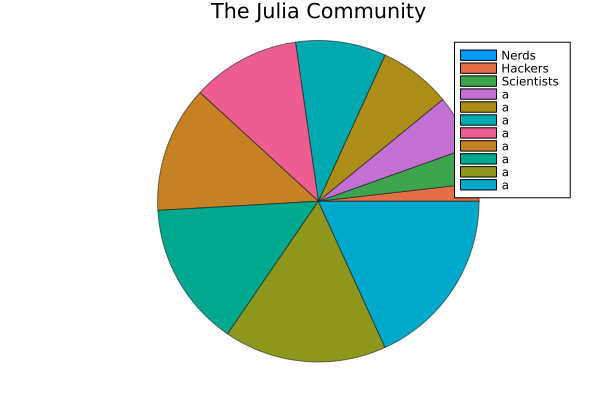

In [5]:
x = ["Nerds", "Hackers", "Scientists","a","a","a","a","a","a","a","a"]
y = collect(0:0.1:1)
pie(x, y, title = "The Julia Community", l = 0.5)

In [ ]:
l1 = (19.4906, -99.0478)
l2 = (19.4884, -99.0551)
println(sqrt((l1[1]-l2[1])^2+(l1[2]-l2[2])^2))
haversine(l1, l2, 6372.8)

#  Centro histórico

In [ ]:
datos = DataFrame(CSV.File("Establecimientoseconomicos1.csv"))

In [ ]:
coordenadas = datos[!,[5,6]]

In [ ]:
for i in 1:3207
    if coordenadas.Longitud[i] == "Cuauhtémoc, Cuauhtémoc"
        return i
    end
end

In [ ]:
N = length(datos.Id)
M = zeros(N,N)

for i in 1:N
    for j in 1:N
        x1, y1 = coordenadas[i,1], coordenadas[i,2]
        x2, y2 = coordenadas[j,1], coordenadas[j,2]
        M[i,j] = sqrt((x2-x1)^2+(y2-y1)^2)
    end
end

In [ ]:
heatmap(M)

In [ ]:
for h in range(0, stop = 0.02, step = 0.0001)
    A = M .< h
    G = Graph(A)
    if is_connected(G)
        return h
    end
end

In [ ]:
M = M .< 0.0171

In [ ]:
g = Graph(M)


In [ ]:
gplot(g,coordenadas[:,1],coordenadas[:,2])

In [ ]:
import Cairo,Fontconfig
using Compose #Sirve para guradar las gráficas en diversos formatos
draw(PDF("Centrohist.pdf", 10cm, 10cm),gplot(g,coordenadas[:,1],coordenadas[:,2]))
draw(PDF("centrohist.pdf", 10cm, 10cm),gplot(g))

Existe un inconveniente con la red del centro histórico por medio de distancias, que por desgracia no se genera red. El espacio es tan grande que para que la red sea conexa necesita cuatro millones de enlaces y eso vuelve loca a la compu. No soporta

#  tablas

In [8]:
include("tabla.jl")

10×3 DataFrame
 Row │ Color                         Id_Sector_Economico  Descripcion          ⋯
     │ RGB…                          Int64                String               ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ RGB{N0f8}(0.0,0.0,0.0)                     434211  Comercio al por mayo ⋯
   2 │ RGB{N0f8}(1.0,1.0,0.455)                   434221  Comercio al por mayo
   3 │ RGB{N0f8}(1.0,0.608,1.0)                   434311  Comercio al por mayo
   4 │ RGB{N0f8}(0.0,0.827,1.0)                   434224  Comercio al por mayo
   5 │ RGB{N0f8}(0.886,0.388,0.051)               435313  Comercio al por mayo ⋯
   6 │ RGB{N0f8}(0.0,0.494,0.0)                   435312  Comercio al por mayo
   7 │ RGB{N0f8}(0.0,0.494,0.0)                   435312  Comercio al por mayo
   8 │ RGB{N0f8}(0.0,0.314,0.902)                 434225  Comercio al por mayo
   9 │ RGB{N0f8}(0.0,0.314,0.902)                 434225  Comercio al por mayo ⋯
  10 │ RGB{N0f8}(0.0,0.0,0.0)                     434211  Comercio al por mayo
                                                                1 column omitted

In [7]:
color_vec = ["#0e4589" ,"#0c75d0", "#0e3c31", "#0210ac", "#02ff92",
    "#009339", "#0bc841", "#01db61", "#021cf7", "#0bf347",
    "#08beb5", "#02c7dd", "#05fc92", "#02fa9d", "#031809",
    "#046863", "#064247", "#0355fd", "#00acdd", "#03b76a",
    "#0d70e7", "#0ed610", "#02e707", "#0cade9", "#02a983",
    "#080a0c", "#07925b", "#022b5c", "#0a61ce", "#0d88a6",
    "#0d6d68", "#060987", "#07a079", "#0a5fe0", "#0f0d63",
    "#0bb1fe", "#09806e", "#061b80", "#0151fa", "#028862",
    "#0453a4", "#04d2a4", "#0d53a8", "#0f30d6", "#0eb974",
    "#0548a7", "#0058c2", "#012b6c", "#000900", "#0cbc5c",
    "#0bf49d", "#0b0aee", "#089ea7", "#0d1ff5", "#09558e",
    "#056afb", "#0c1cba", "#09c936", "#092762", "#0c3129",
    "#00ec65", "#0aff9a", "#0d9eee", "#0e25f3", "#08cf56",
    "#0c248b", "#03376f", "#023439", "#089fa9", "#0824e0",
    "#0119b3", "#0d900e", "#07a4ad", "#0ed44b", "#0d773e",]

75-element Vector{String}:
 "#0e4589"
 "#0c75d0"
 "#0e3c31"
 "#0210ac"
 "#02ff92"
 "#009339"
 "#0bc841"
 "#01db61"
 "#021cf7"
 "#0bf347"
 "#08beb5"
 "#02c7dd"
 "#05fc92"
 ⋮
 "#0e25f3"
 "#08cf56"
 "#0c248b"
 "#03376f"
 "#023439"
 "#089fa9"
 "#0824e0"
 "#0119b3"
 "#0d900e"
 "#07a4ad"
 "#0ed44b"
 "#0d773e"

In [9]:
tabla.Id_Sector_Economico

10-element Vector{Int64}:
 434211
 434221
 434311
 434224
 435313
 435312
 435312
 434225
 434225
 434211